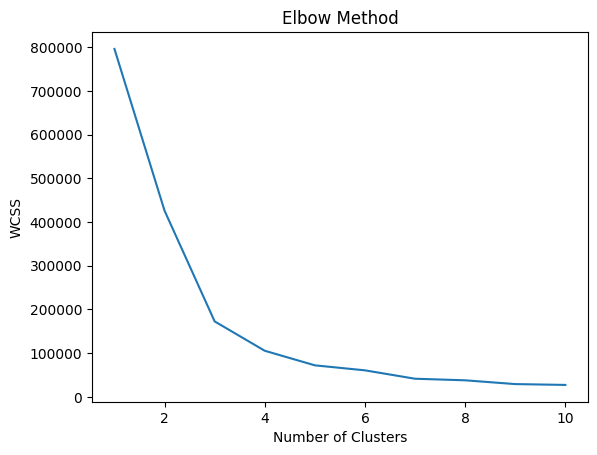

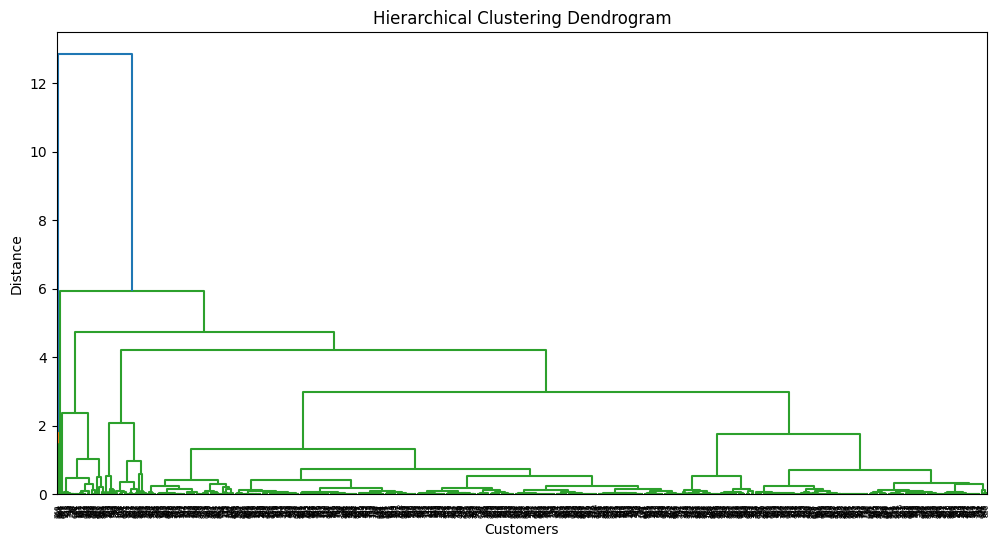

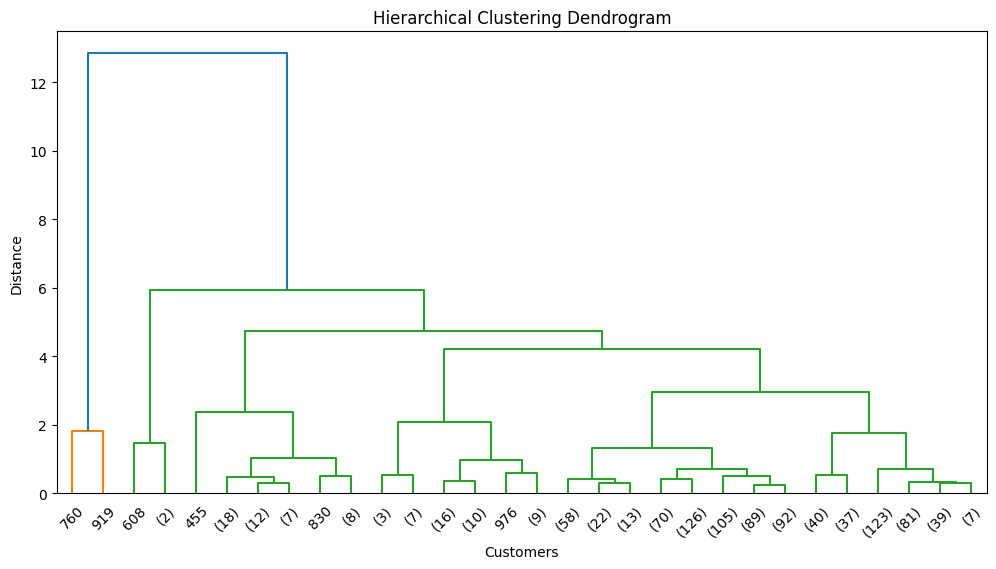

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def preprocess_data(file_path):
    try:
        data = pd.read_csv(file_path)
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='latin-1')

    data['InvoiceNo'] = pd.to_numeric(data['InvoiceNo'], errors='coerce')
    data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

    data.dropna(inplace=True)

    return data

def encode_categorical(data):
    return data

def normalize_numerical(data):
    scaler = StandardScaler()
    numerical_cols = ['Quantity', 'UnitPrice']
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

def perform_kmeans(data, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(data[['Quantity', 'UnitPrice']])
    data['Cluster'] = kmeans.labels_
    return data

def plot_elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data[['Quantity', 'UnitPrice']])
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

def perform_hierarchical_clustering(data_sample, truncate_mode=None, p=None):
    Z = linkage(data_sample[['Quantity', 'UnitPrice']], method='ward')
    plt.figure(figsize=(12, 6))
    if truncate_mode is None:
        dendrogram(Z)  
    else:
        dendrogram(Z, truncate_mode=truncate_mode, p=p)  
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Distance')
    plt.show()

if __name__ == "__main__":
    file_path = "C:\\Users\\AidaBah\\Desktop\\csci1070_course\\mycsclass\\mymaterials\\data.csv"  # Replace with your file path
    data = preprocess_data(file_path)
    data = encode_categorical(data)
    data = normalize_numerical(data)

    data = perform_kmeans(data)

    plot_elbow_method(data)

    sample_size = 1000 
    data_sample = data.sample(n=sample_size, random_state=42)
    perform_hierarchical_clustering(data_sample)
    perform_hierarchical_clustering(data_sample, truncate_mode='lastp', p=30)



#### Q1
Handling null values in my dataset involves dropping rows with missing values using the "dropna()" method. Given the large size of my dataset, it's crucial to efficiently manage memory usage. For encoding categorical variables, I would implement techniques like one-hot encoding or label encoding using a function called "encode_categorical". Numerical variables are normalized using "StandardScaler" to ensure uniform scaling across features and enhance the performance of clustering algorithms.

#### Q2
With a dataset exceeding 500,000 entries, I need to consider computational efficiency and memory constraints when performing k-means clustering. Instead of using the entire dataset, I'll work with a subset to avoid memory issues. To determine the ideal number of clusters, I'll utilize the elbow method, which calculates the Within-Cluster Sum of Squares for different numbers of clusters. This approach helps me identify the optimal number of clusters by observing the "elbow" point in the plot, indicating a significant decrease in WCSS.

#### Q3
Given the large dataset size, I'll perform hierarchical clustering on a sample of the data to manage memory usage effectively. To determine the ideal number of clusters, I'll use the dendrogram, which visually represents the hierarchical clustering process. By analyzing the dendrogram, I can identify natural breakpoints where the distance between clusters significantly increases, indicating distinct segments in the data.

#### Q4
When comparing the results of k-means and hierarchical clustering, I'll consider factors such as cluster characteristics, computational efficiency, and the hierarchical structure of clusters. K-means provides computationally efficient non-overlapping clusters, making it suitable for large datasets like mine. On the other hand, hierarchical clustering offers a detailed view of cluster relationships and structures, albeit at a higher computational cost. Depending on the specific objectives and characteristics of my data, I'll choose the clustering approach that best meets my analytical needs.